# **Marketing Insights For E-Commerce Company**

**Business Context:**
One of the leading E-Commerce Company would like to get marketing insights from the data to
define marketing strategies going forward. Also, expecting to build an analytical dashboard to
monitor various KPI’s & business metrics.



**Available Data:**
Transaction data has been provided for the period of 1st Jan 2019 to 31st Dec 2019.

In [1]:
#importing the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import warnings
warnings.filterwarnings("ignore", message="`should_run_async` will not call `transform_cell` automatically")

In [2]:
#reading files
cust=pd.read_excel('/content/drive/MyDrive/Datesets/4_marketing_insights/CustomersData.xlsx')
disc=pd.read_csv('/content/drive/MyDrive/Datesets/4_marketing_insights/Discount_Coupon.csv')
market=pd.read_csv('/content/drive/MyDrive/Datesets/4_marketing_insights/Marketing_Spend.csv')
online=pd.read_csv('/content/drive/MyDrive/Datesets/4_marketing_insights/Online_Sales.csv')
tax=pd.read_excel('/content/drive/MyDrive/Datesets/4_marketing_insights/Tax_amount.xlsx')

In [3]:
#removing extra space from product category
disc['Product_Category'] = disc['Product_Category '].str.strip()

In [4]:
#merging the data
cust_online=pd.merge(cust,online,on='CustomerID',how='right')
cust_online.head(1)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,M,Chicago,12,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used


In [5]:
disc_tax=pd.merge(disc, tax, on='Product_Category', how='left')

In [6]:
cust_online_disc_tax=pd.merge(cust_online,disc_tax, on='Product_Category', how='inner')

In [7]:
#converting Transaction Date in a proper date format
from datetime import datetime
cust_online_disc_tax['Transaction_Date'] = [datetime.strptime(str(date), '%Y%m%d').strftime('%m/%d/%Y') for date in cust_online_disc_tax['Transaction_Date']]

In [8]:
#converting datatype of Transaction_Date to datetime format
cust_online_disc_tax['Transaction_Date'] = pd.to_datetime(cust_online_disc_tax['Transaction_Date'])

In [9]:
market['Date'] = pd.to_datetime(market['Date'])

In [10]:
#final data after merging all the tables
final_df=pd.merge(cust_online_disc_tax,market,left_on='Transaction_Date',right_on='Date')

In [11]:
#since Transaction_Date and Date are same column ,so one is redundant ... dropping Transaction_Date
final_df=final_df.drop(columns=['Transaction_Date'])

In [12]:
#checking null values
final_df.isna().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
Month                  0
Product_Category       0
Coupon_Code            0
Discount_pct           0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
dtype: int64

In [13]:
#from date column extracting Month name
final_df['Month_org'] = pd.to_datetime(final_df['Date']).dt.strftime('%b')

In [14]:
#analysing final data
final_df.head(2)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,...,Coupon_Status,Month,Product_Category,Coupon_Code,Discount_pct,GST,Date,Offline_Spend,Online_Spend,Month_org
0,17850,M,Chicago,12,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,...,Used,Jan,Nest-USA,ELEC10,10,0.1,2019-01-01,4500,2424.5,Jan
1,17850,M,Chicago,12,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,...,Used,Feb,Nest-USA,ELEC20,20,0.1,2019-01-01,4500,2424.5,Jan


#1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level


Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

In [15]:
final_df['Invoice_Value']=((final_df['Quantity'] * final_df['Avg_Price']) * (1 - final_df['Discount_pct']*0.01) * (1 + final_df['GST'])) + final_df['Delivery_Charges']


#2. Perform Detailed exploratory analysis

 Understanding how many customers acquired every month

In [16]:
#getting minimum date for every disctinct customer when they order
min_transaction_dates=final_df.groupby('CustomerID')['Date'].min()

In [17]:
#getting month names frok dates
min_transaction_month_names=min_transaction_dates.dt.strftime('%b')

In [18]:
#applying group by on month names to count number of customers
monthly_customer_count=final_df.groupby(min_transaction_month_names)['CustomerID'].count()

In [19]:
# for months in order
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_customer_count=monthly_customer_count.loc[months]
monthly_customer_count

Date
Jan    215
Feb     96
Mar    177
Apr    163
May    112
Jun    137
Jul     93
Aug    136
Sep     78
Oct     87
Nov     68
Dec    106
Name: CustomerID, dtype: int64

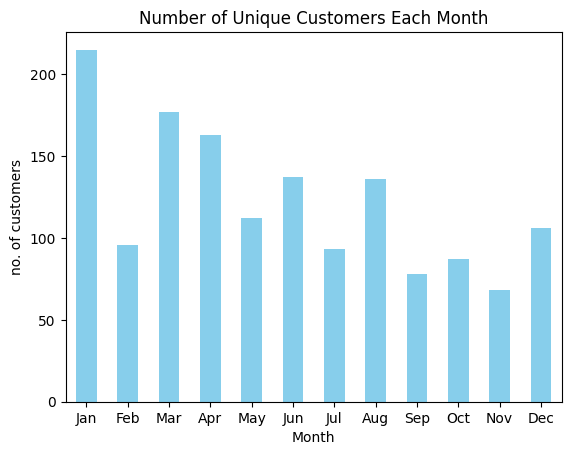

In [20]:
plt.title('Number of Unique Customers Each Month')
monthly_customer_count.plot(kind='bar',color='skyblue')
plt.xlabel('Month')
plt.ylabel('no. of customers')
plt.xticks(rotation=0)
plt.show()

 Understand the retention of customers on month on month basis

In [21]:
#I've already answered this question thoroughly; please see section 7 on cohort analysis for reference.

How the revenues from existing/new customers on month on month basis

In [22]:
# Calculate total revenue for each customer
rev = final_df.groupby('CustomerID')['Invoice_Value'].sum()

# Sort the results in descending order
rev = rev.sort_values(ascending=False)

print(rev)

CustomerID
12748    879262.04448
15311    866231.96640
14606    696379.14912
14911    603558.81792
17841    582490.68096
             ...     
15468       103.57440
16593        94.79040
13748        92.04672
12875        84.67200
13068        82.56000
Name: Invoice_Value, Length: 1468, dtype: float64


CustomerID 12748,15311 are our most premium customer because they boast the highest revenue contribution.

 How the discounts playing role in the revenues?

In [23]:
#discount affect on revenue
final_df.groupby(['Month', 'Discount_pct'])['Invoice_Value'].sum().loc[months]

Month  Discount_pct
Jan    10              5.189547e+06
Feb    20              4.674074e+06
Mar    30              4.158601e+06
Apr    10              5.189547e+06
May    20              4.674074e+06
Jun    30              4.158601e+06
Jul    10              5.189547e+06
Aug    20              4.674074e+06
Sep    30              4.158601e+06
Oct    10              5.189547e+06
Nov    20              4.674074e+06
Dec    30              4.158601e+06
Name: Invoice_Value, dtype: float64

Analyse KPI’s like Revenue, number of orders, average order value, number of
customers (existing/new), quantity, by category, by month, by week, by day etc…

In [24]:
# Revenue analysis by month
revenue_by_month = final_df.groupby('Month_org')['Invoice_Value'].sum()

# Revenue analysis by week
final_df['Week'] = final_df['Date'].dt.week

revenue_by_week = final_df.groupby('Week')['Invoice_Value'].sum()

# Revenue analysis by day
revenue_by_day = final_df.groupby('Date')['Invoice_Value'].sum()

print('Revenue analysis by month:',revenue_by_month)
print('###########################################')
print('Revenue analysis by week:',revenue_by_week)
print('###########################################')
print('Revenue analysis by day:',revenue_by_day)

<ipython-input-24-655288ad4d83>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  final_df['Week'] = final_df['Date'].dt.week


Revenue analysis by month: Month_org
Apr    4.768966e+06
Aug    4.988390e+06
Dec    5.962900e+06
Feb    3.891968e+06
Jan    4.985464e+06
Jul    4.541730e+06
Jun    3.874193e+06
Mar    4.436687e+06
May    3.763656e+06
Nov    5.705786e+06
Oct    4.849786e+06
Sep    4.319355e+06
Name: Invoice_Value, dtype: float64
###########################################
Revenue analysis by week: Week
1     1.325666e+06
2     1.058568e+06
3     1.083467e+06
4     1.114077e+06
5     1.065092e+06
6     9.354442e+05
7     1.039503e+06
8     1.019141e+06
9     8.826668e+05
10    9.811236e+05
11    8.571831e+05
12    1.167096e+06
13    9.864912e+05
14    1.298534e+06
15    9.283699e+05
16    1.460894e+06
17    9.361190e+05
18    8.625795e+05
19    8.410690e+05
20    7.924116e+05
21    8.125368e+05
22    8.494649e+05
23    7.816600e+05
24    1.045389e+06
25    9.205197e+05
26    8.772684e+05
27    7.879226e+05
28    1.122188e+06
29    1.266669e+06
30    9.625073e+05
31    1.418000e+06
32    1.106112e+06
33  

In [25]:
# Number of orders analysis by month
orders_by_month = final_df.groupby('Month_org')['Transaction_ID'].nunique()

# Number of orders analysis by week
orders_by_week = final_df.groupby('Week')['Transaction_ID'].nunique()

# Number of orders analysis by day
orders_by_day = final_df.groupby('Date')['Transaction_ID'].nunique()

print('Number of orders by month:',orders_by_month)
print('###########################################')
print('Number of orders by week:',orders_by_week)
print('###########################################')
print('Number of orders by day:',orders_by_day)

Number of orders by month: Month_org
Apr    1806
Aug    2411
Dec    2684
Feb    1658
Jan    2096
Jul    2079
Jun    1934
Mar    1982
May    2019
Nov    2279
Oct    2123
Sep    1929
Name: Transaction_ID, dtype: int64
###########################################
Number of orders by week: Week
1     571
2     428
3     465
4     460
5     461
6     401
7     452
8     404
9     406
10    474
11    406
12    454
13    443
14    374
15    440
16    477
17    431
18    530
19    449
20    420
21    436
22    401
23    411
24    493
25    461
26    436
27    366
28    525
29    526
30    466
31    560
32    563
33    532
34    508
35    501
36    419
37    428
38    447
39    528
40    502
41    536
42    427
43    461
44    468
45    450
46    473
47    556
48    658
49    687
50    726
51    756
52    347
Name: Transaction_ID, dtype: int64
###########################################
Number of orders by day: Date
2019-01-01     41
2019-01-02     69
2019-01-03    124
2019-01-04     89
2019-01-

In [26]:
customers_by_month = final_df.groupby('Month_org')['CustomerID'].nunique()

# Number of customers analysis by week
customers_by_week = final_df.groupby('Week')['CustomerID'].nunique()

# Number of customers analysis by day
customers_by_day = final_df.groupby('Date')['CustomerID'].nunique()

print('Number of customers by month:',customers_by_month)
print('###########################################')
print('Number of customers by week:',customers_by_week)
print('###########################################')
print('Number of customers by day:',customers_by_day)

Number of customers by month: Month_org
Apr    224
Aug    300
Dec    236
Feb    109
Jan    215
Jul    235
Jun    259
Mar    208
May    200
Nov    188
Oct    210
Sep    193
Name: CustomerID, dtype: int64
###########################################
Number of customers by week: Week
1     53
2     43
3     48
4     45
5     64
6     37
7     30
8     21
9     25
10    50
11    35
12    71
13    53
14    59
15    57
16    82
17    34
18    42
19    38
20    42
21    80
22    48
23    55
24    72
25    75
26    61
27    40
28    94
29    74
30    51
31    77
32    58
33    78
34    71
35    73
36    50
37    61
38    38
39    44
40    68
41    40
42    49
43    56
44    51
45    34
46    48
47    45
48    60
49    66
50    81
51    65
52    28
Name: CustomerID, dtype: int64
###########################################
Number of customers by day: Date
2019-01-01     7
2019-01-02    10
2019-01-03    14
2019-01-04     6
2019-01-05     9
              ..
2019-12-27     7
2019-12-28     5
2019-12

Understand the trends/seasonality of sales by category, location, month etc…

In [27]:
grouped_df = final_df[['Product_Category', 'Month', 'Quantity']].groupby(['Product_Category', 'Month']).sum()

# Sorting by 'Month' and 'Quantity'
sorted_df = grouped_df.sort_values(by=['Month', 'Quantity'], ascending=[False, False]).reset_index()

In [28]:
sorted_df

,Product_Category,Month,Quantity
0,Office,Sep,88383
1,Apparel,Sep,32438
2,Drinkware,Sep,30501
3,Lifestyle,Sep,24881
4,Nest-USA,Sep,21430
...,...,...,...
187,Waze,Apr,1144
188,Accessories,Apr,1097
189,Nest-Canada,Apr,469
190,Gift Cards,Apr,206


Office-related products are experiencing higher sales frequency.

In [29]:
loc=final_df.groupby(['Location','Month_org'])['Invoice_Value'].sum()
loc_unstacked = loc.unstack(level=0).loc[months]

<Figure size 500x1500 with 0 Axes>

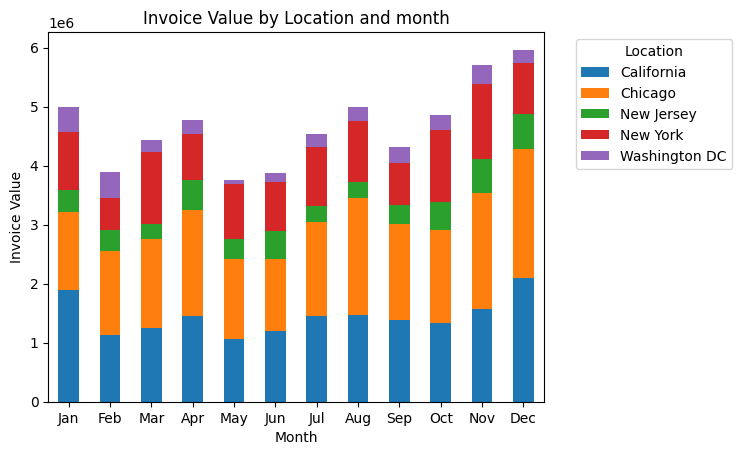

In [30]:
# Set the figure size
plt.figure(figsize=(5, 15))

# Plot
loc_unstacked.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Invoice Value')
plt.title('Invoice Value by Location and month')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

How number order varies and sales with different days?

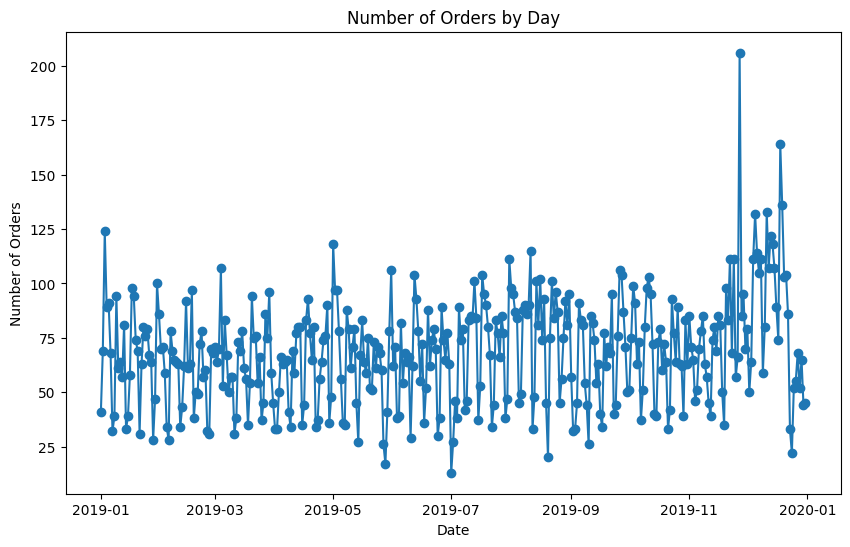

In [31]:
# Plotting number of orders by day
plt.figure(figsize=(10, 6))
plt.plot(orders_by_day.index, orders_by_day.values, marker='o')
plt.title('Number of Orders by Day')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

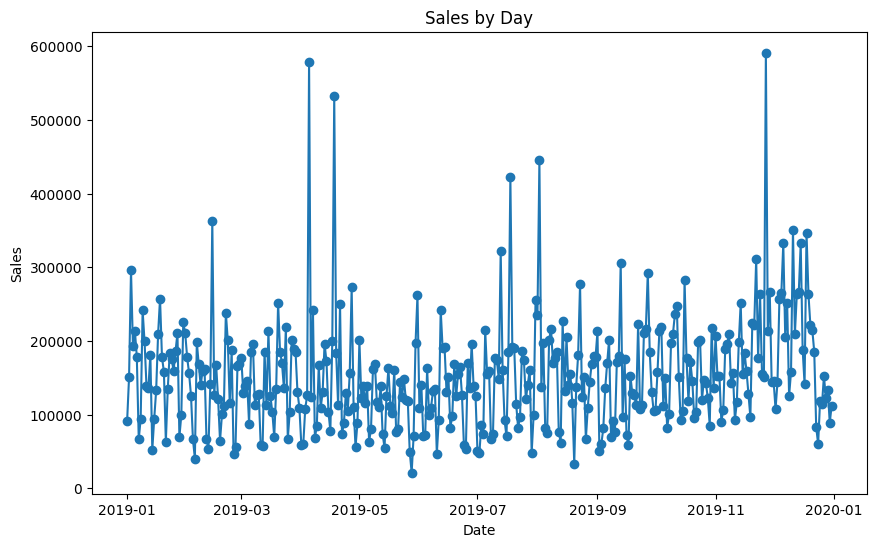

In [32]:
# Plotting sales by day
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_day.index, revenue_by_day.values, marker='o')
plt.title('Sales by Day')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.show()

Calculate the Revenue, Marketing spend, percentage of marketing spend out of
revenue, Tax, percentage of delivery charges by month.

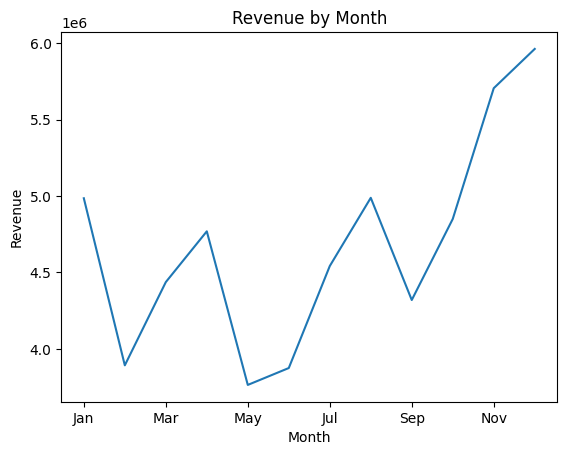

In [33]:
final_df.groupby('Month_org')['Invoice_Value'].sum().loc[months].plot()
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Month')
plt.show()

December gives us highest revenue, while may give the least

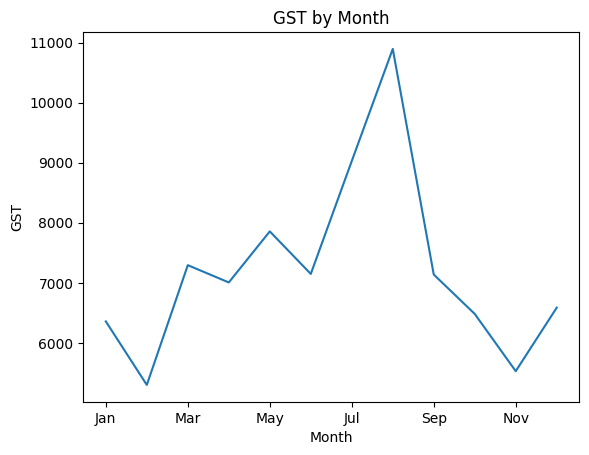

In [34]:
final_df.groupby(['Month_org'])['GST'].sum().loc[months].plot()
plt.xlabel('Month')
plt.ylabel('GST')
plt.title('GST by Month')
plt.show()

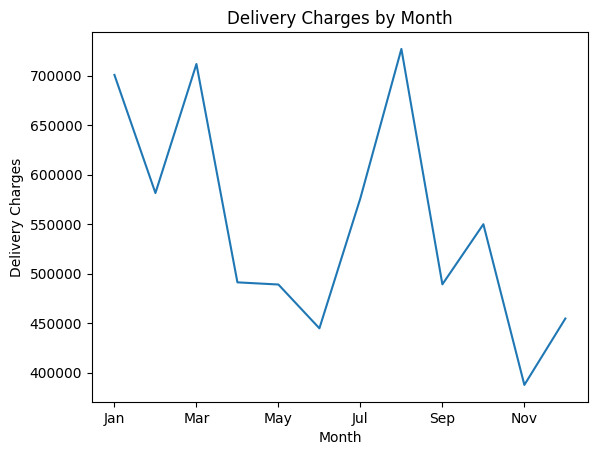

In [35]:
final_df.groupby(['Month_org'])['Delivery_Charges'].sum().loc[months].plot()
plt.xlabel('Month')
plt.ylabel('Delivery Charges')
plt.title('Delivery Charges by Month')
plt.show()

How marketing spend is impacting on revenue?

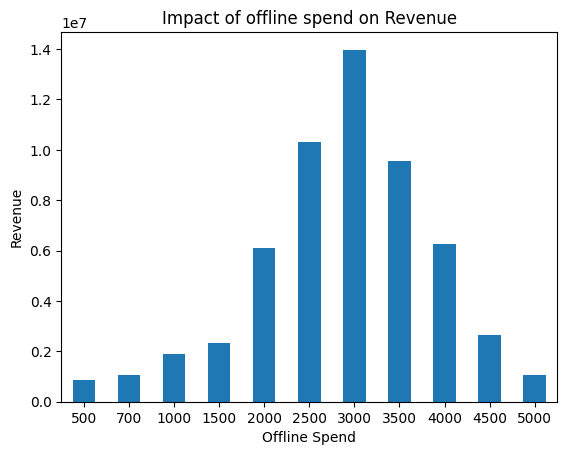

In [36]:
#offline impact
final_df.groupby('Offline_Spend')['Invoice_Value'].sum().plot(kind ='bar')
plt.title('Impact of offline spend on Revenue')
plt.xlabel('Offline Spend')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()

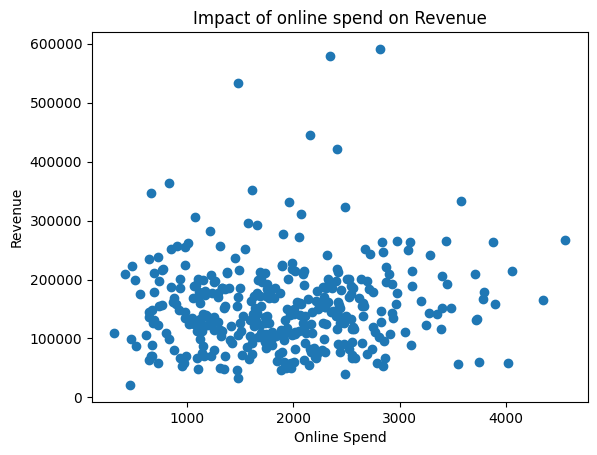

In [37]:
#online impact
grouped_df = final_df.groupby('Online_Spend')['Invoice_Value'].sum().reset_index()

# Plot scatter plot
plt.scatter(grouped_df['Online_Spend'], grouped_df['Invoice_Value'])
plt.xlabel('Online Spend')
plt.ylabel('Revenue')
plt.title('Impact of online spend on Revenue')
plt.show()

Which product was appeared in the transactions?

In [38]:
tran_max=final_df.groupby('Product_Category')['Invoice_Value'].sum().reset_index().sort_values(by='Invoice_Value',ascending=False)
print(tran_max)

        Product_Category  Invoice_Value
12              Nest-USA   2.816806e+07
2                Apparel   8.818873e+06
10                  Nest   5.416384e+06
14                Office   4.104324e+06
5              Drinkware   2.875156e+06
3                   Bags   2.021830e+06
9              Lifestyle   1.361475e+06
13  Notebooks & Journals   1.269136e+06
11           Nest-Canada   7.836492e+05
7               Headgear   6.285546e+05
6             Gift Cards   1.969009e+05
15                  Waze   1.357456e+05
4                Bottles   1.118500e+05
0            Accessories   1.104917e+05
8             Housewares   7.454458e+04
1                Android   1.190876e+04


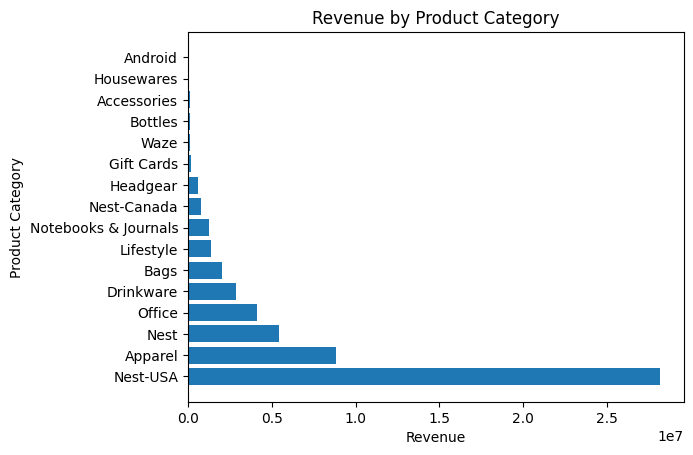

In [39]:
plt.barh(tran_max['Product_Category'], tran_max['Invoice_Value'])
plt.xlabel('Revenue')
plt.ylabel('Product Category')
plt.title('Revenue by Product Category')
plt.show()

**Nest-USA** most appeared in the transactions

Which product was purchased mostly based on the quantity

---



In [40]:
max_qty=final_df.groupby('Product_Category')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)
print(max_qty)

        Product_Category  Quantity
14                Office   1060596
2                Apparel    389256
5              Drinkware    366012
9              Lifestyle    298572
12              Nest-USA    257160
3                   Bags    183276
13  Notebooks & Journals    114672
7               Headgear     42396
10                  Nest     34044
8             Housewares     29808
4                Bottles     25080
15                  Waze     13728
0            Accessories     13164
11           Nest-Canada      5628
6             Gift Cards      2472
1                Android       540


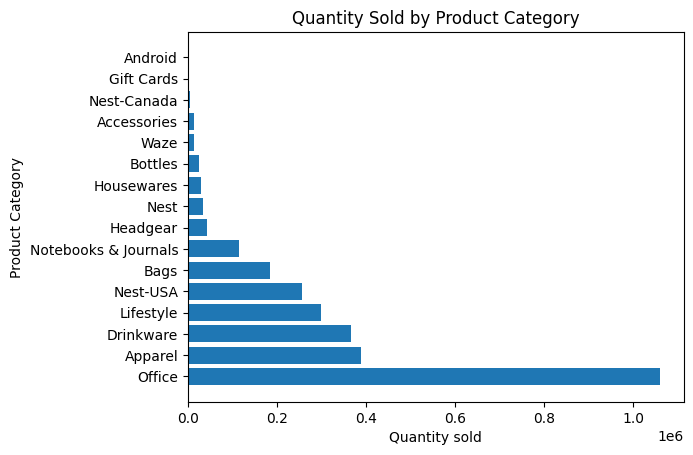

In [41]:
plt.barh(max_qty['Product_Category'], max_qty['Quantity'])
plt.xlabel('Quantity sold')
plt.ylabel('Product Category')
plt.title('Quantity Sold by Product Category')
plt.show()

# 3. Performing Customer Segmentation

Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver,
Standard customers and define strategy on the same.

In [42]:
data=final_df

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,630288.0,15345.347213,1766.847257,12346.00000,13869.00,15311.00000,16996.0000,18283.00000
Tenure_Months,630288.0,26.140393,13.473382,2.00000,15.00,27.00000,37.0000,50.00000
Transaction_ID,630288.0,32445.093367,8654.649181,16679.00000,25404.00,32678.00000,39174.2500,48497.00000
Quantity,630288.0,4.500171,20.159809,1.00000,1.00,1.00000,2.0000,900.00000
Avg_Price,630288.0,52.429089,64.156089,0.39000,5.70,16.99000,119.0000,355.74000
Delivery_Charges,630288.0,10.476922,19.342984,0.00000,6.00,6.00000,6.5000,521.36000
Discount_pct,630288.0,20.000000,8.164972,10.00000,10.00,20.00000,30.0000,30.00000
GST,630288.0,0.137433,0.045865,0.05000,0.10,0.18000,0.1800,0.18000
Offline_Spend,630288.0,2832.428985,935.604089,500.00000,2500.00,3000.00000,3500.0000,5000.00000
Online_Spend,630288.0,1894.216417,807.153596,320.25000,1252.63,1837.87000,2425.3500,4556.93000


In [44]:
rfm_data = pd.DataFrame()
rfm_data['CustomerID']=final_df['CustomerID']

In [45]:
#using set to remove duplicates customer ids
rfm_data['CustomerID']=pd.DataFrame(list(set(rfm_data['CustomerID'])))

In [46]:
rfm_data.dropna(inplace=True)

In [47]:
#distinct customers
rfm_data

,CustomerID
0,16385.0
1,16387.0
2,16393.0
3,16395.0
4,16401.0
...,...
1463,16353.0
1464,16359.0
1465,16365.0
1466,16367.0


In [48]:
# sorting customer id
rfm_data=rfm_data.sort_values(by='CustomerID',ascending=True)

In [49]:
final_df['Last_transaction']=final_df.groupby(by='CustomerID')['Date'].transform(max)

In [50]:
final_df['recency'] =final_df['Last_transaction'].max() - final_df['Last_transaction']

In [51]:
data['Recency']=pd.to_numeric(final_df['recency'].astype(str).str.replace(" days",""))

In [52]:
#for recency
recency= data.groupby('CustomerID')['Recency'].mean().copy()
r=pd.DataFrame(recency)

In [53]:
#appending recency to rfm_data
rfm_data = rfm_data.merge(r, left_on='CustomerID', right_index=True, how='left')

In [54]:
#for frequency
f=(data.groupby('CustomerID')['Transaction_ID'].count())

In [55]:
#appending frequency to rfm_data
rfm_data = rfm_data.merge(f, left_on='CustomerID', right_index=True, how='left')

In [56]:
#for monetary
m=data.groupby('CustomerID')['Invoice_Value'].sum()

In [57]:
#appending monetary to rfm_data
rfm_data = rfm_data.merge(m, left_on='CustomerID', right_index=True, how='left')

In [58]:
#renaming columns
rfm_data.rename(columns = {'Transaction_ID': 'Frequency', 'Invoice_Value':'Monetary' }, inplace=True)

In [59]:
#Analyzing the final RFM (Recency, Frequency, Monetary) data.
rfm_data

,CustomerID,Recency,Frequency,Monetary
488,12346.0,107.0,24,2142.60672
489,12347.0,59.0,708,160334.29440
490,12348.0,73.0,276,18164.71968
491,12350.0,17.0,204,16014.56832
492,12356.0,107.0,432,22954.48608
...,...,...,...,...
483,18259.0,270.0,72,8780.07840
484,18260.0,87.0,468,32184.68736
485,18269.0,194.0,96,1766.02944
486,18277.0,69.0,12,3218.88000


In [60]:
data_final1=rfm_data

In [61]:
data_final1

,CustomerID,Recency,Frequency,Monetary
488,12346.0,107.0,24,2142.60672
489,12347.0,59.0,708,160334.29440
490,12348.0,73.0,276,18164.71968
491,12350.0,17.0,204,16014.56832
492,12356.0,107.0,432,22954.48608
...,...,...,...,...
483,18259.0,270.0,72,8780.07840
484,18260.0,87.0,468,32184.68736
485,18269.0,194.0,96,1766.02944
486,18277.0,69.0,12,3218.88000


In [62]:
 # Creating 'seg' column based on 10 quantile bins of 'Monetary' column in rfm_data DataFrame

 rfm_data['seg']=pd.qcut(rfm_data.Monetary, q =10, labels=False)

In [63]:
rfm_data

,CustomerID,Recency,Frequency,Monetary,seg
488,12346.0,107.0,24,2142.60672,0
489,12347.0,59.0,708,160334.29440,9
490,12348.0,73.0,276,18164.71968,4
491,12350.0,17.0,204,16014.56832,4
492,12356.0,107.0,432,22954.48608,5
...,...,...,...,...,...
483,18259.0,270.0,72,8780.07840,2
484,18260.0,87.0,468,32184.68736,6
485,18269.0,194.0,96,1766.02944,0
486,18277.0,69.0,12,3218.88000,1


In [64]:
# Group by 'seg' column and calculate the mean of 'Recency', 'Monetary', and 'Frequency', then transpose the result
rfm_data[['Recency', 'Monetary', 'Frequency','seg']].groupby('seg').mean().T

seg,0,1,2,3,4,5,6,7,8,9
Recency,186.517007,169.585034,158.142857,161.856164,162.115646,139.721088,121.773973,129.877551,127.040816,86.258503
Monetary,963.091585,4306.518452,8280.466286,12409.887097,18091.078981,25041.581976,34122.051899,47386.484885,71046.273293,160226.133701
Frequency,31.836735,88.000000,137.795918,172.438356,225.877551,300.000000,411.452055,543.183673,771.673469,1609.387755


"In the table, it's clear that as the monetary value increases, the frequency goes up while the recency decreases."

In [65]:
# Calculating quantiles (33rd and 67th percentiles) for r,f and m
quantiles = rfm_data[['Frequency','Monetary','Recency' ]].quantile(q=[0.33,0.67])
quantiles

,Frequency,Monetary,Recency
0.33,156.0,11483.517782,78.00
0.67,420.0,36479.872656,187.89


In [66]:


# Segmenting based on Recency
rfm_data['r_seg'] = np.where(rfm_data['Recency'] <= 78, 'Active',
                              np.where(rfm_data['Recency'] <= 188, 'At Risk', 'Churn'))

# Segmenting based on Monetary
rfm_data['m_seg'] = np.where(rfm_data['Monetary'] <= 11483.51, 1,
                              np.where(rfm_data['Monetary'] <= 36479.87, 2, 3))

# Segmenting based on Frequency
rfm_data['f_seg'] = np.where(rfm_data['Frequency'] <= 156.0, 1,
                              np.where(rfm_data['Frequency'] <= 420.0, 2, 3))


In [67]:
rfm_data

,CustomerID,Recency,Frequency,Monetary,seg,r_seg,m_seg,f_seg
488,12346.0,107.0,24,2142.60672,0,At Risk,1,1
489,12347.0,59.0,708,160334.29440,9,Active,3,3
490,12348.0,73.0,276,18164.71968,4,Active,2,2
491,12350.0,17.0,204,16014.56832,4,Active,2,2
492,12356.0,107.0,432,22954.48608,5,At Risk,2,3
...,...,...,...,...,...,...,...,...
483,18259.0,270.0,72,8780.07840,2,Churn,1,1
484,18260.0,87.0,468,32184.68736,6,At Risk,2,3
485,18269.0,194.0,96,1766.02944,0,Churn,1,1
486,18277.0,69.0,12,3218.88000,1,Active,1,1


In [68]:
# Creating 'fm_seg' column based on conditions comparing 'f_seg' and 'm_seg' columns to determine customer segments: Platinum, Gold, Silver, Standard
rfm_data['fm_seg'] = np.where(((rfm_data.f_seg == 3) & (rfm_data.m_seg ==3)) , 'Platinum',
                          np.where((((rfm_data.f_seg == 3) & (rfm_data.m_seg ==2)) | ((rfm_data.f_seg == 2) & (rfm_data.m_seg ==3))) , 'Gold',
                          np.where((((rfm_data.f_seg == 1) & (rfm_data.m_seg ==3)) | ((rfm_data.f_seg == 3) & (rfm_data.m_seg ==1)) | ((rfm_data.f_seg == 2) & (rfm_data.m_seg ==2))), 'Silver', 'Standard' )))

In [69]:
rfm_data[rfm_data['r_seg']=='Churn']

,CustomerID,Recency,Frequency,Monetary,seg,r_seg,m_seg,f_seg,fm_seg
494,12370.0,189.0,1080,81511.92960,8,Churn,3,3,Platinum
512,12429.0,262.0,240,29804.49312,6,Churn,2,2,Silver
514,12433.0,265.0,1740,194109.43104,9,Churn,3,3,Platinum
515,12434.0,222.0,36,561.75360,0,Churn,1,1,Standard
517,12441.0,277.0,132,19351.79904,4,Churn,2,1,Standard
...,...,...,...,...,...,...,...,...,...
472,18219.0,219.0,288,13946.62752,3,Churn,2,2,Silver
474,18225.0,256.0,36,1359.45600,0,Churn,1,1,Standard
477,18230.0,202.0,24,1581.77472,0,Churn,1,1,Standard
483,18259.0,270.0,72,8780.07840,2,Churn,1,1,Standard


In [70]:
rfm_data

,CustomerID,Recency,Frequency,Monetary,seg,r_seg,m_seg,f_seg,fm_seg
488,12346.0,107.0,24,2142.60672,0,At Risk,1,1,Standard
489,12347.0,59.0,708,160334.29440,9,Active,3,3,Platinum
490,12348.0,73.0,276,18164.71968,4,Active,2,2,Silver
491,12350.0,17.0,204,16014.56832,4,Active,2,2,Silver
492,12356.0,107.0,432,22954.48608,5,At Risk,2,3,Gold
...,...,...,...,...,...,...,...,...,...
483,18259.0,270.0,72,8780.07840,2,Churn,1,1,Standard
484,18260.0,87.0,468,32184.68736,6,At Risk,2,3,Gold
485,18269.0,194.0,96,1766.02944,0,Churn,1,1,Standard
486,18277.0,69.0,12,3218.88000,1,Active,1,1,Standard


In [71]:
#Profiling
rfm_data[['Recency', 'Monetary', 'Frequency','r_seg', 'fm_seg']].groupby(['r_seg', 'fm_seg']).mean().T

r_seg           Active                                            \
fm_seg            Gold       Platinum        Silver     Standard   
Recency       33.50000      35.145078     36.126126    35.977273   
Monetary   42788.13193  109892.435376  24609.489418  8991.133331   
Frequency    374.88000    1127.626943    267.135135   104.181818   

r_seg           At Risk                                           \
fm_seg             Gold      Platinum        Silver     Standard   
Recency      121.739130    125.701493    134.646465   134.466063   
Monetary   34095.155082  85319.711893  22280.301547  6641.355032   
Frequency    496.956522   1023.761194    292.242424   102.135747   

r_seg             Churn                                           
fm_seg             Gold      Platinum        Silver     Standard  
Recency      265.694444    272.068182    255.238938   272.506122  
Monetary   40086.191707  75278.594891  21486.508808  6740.614045  
Frequency    408.666667    816.954545    262.300885    92.718367

Scientific (Using K-Means) & Understand the profiles. Define strategy for each
segment.

In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score

In [73]:
data_final1=data_final1[['CustomerID', 'Recency', 'Frequency', 'Monetary']]


In [74]:
for k in [3,4,5,6,7,8]:
    model = KMeans(n_clusters=k,n_init=10).fit(data_final1)
    print("SC SCore for cluster solution:", k)
    print(k, ": ", silhouette_score(data_final1, labels=model.labels_))
    print("Segment distribution for cluster solution:", k)
    print(pd.Series(model.labels_).value_counts()/pd.Series(model.labels_).value_counts().sum())
    print("-------------------------------------------------")

SC SCore for cluster solution: 3
3 :  0.7117209219617574
Segment distribution for cluster solution: 3
0    0.834469
1    0.160763
2    0.004768
dtype: float64
-------------------------------------------------
SC SCore for cluster solution: 4
4 :  0.6794923010012887
Segment distribution for cluster solution: 4
3    0.771117
1    0.202997
0    0.022480
2    0.003406
dtype: float64
-------------------------------------------------
SC SCore for cluster solution: 5
5 :  0.6106259689447824
Segment distribution for cluster solution: 5
0    0.617847
4    0.254087
3    0.105586
1    0.019074
2    0.003406
dtype: float64
-------------------------------------------------
SC SCore for cluster solution: 6
6 :  0.5919665040494665
Segment distribution for cluster solution: 6
1    0.532698
3    0.273842
0    0.130109
5    0.049046
4    0.010899
2    0.003406
dtype: float64
-------------------------------------------------
SC SCore for cluster solution: 7
7 :  0.5924836284355933
Segment distribution fo

Choosing best solution (optimal solution) - Identifying best value of K Metrics
   
   
    a. Silhoutte coeficient	between -1 & 1
        Closer to 1, segmentation is good
        Closer to-1, segmentation is bad

for k=3 sc score is 0.711 so we choose value of k=3

In [75]:
KM_3 = KMeans(n_clusters=3, n_init=10).fit(data_final1)

In [76]:
data_final1['KM_3'] = KM_3.labels_

<ipython-input-76-38aca5655090>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final1['KM_3'] = KM_3.labels_


In [77]:
data_final1

,CustomerID,Recency,Frequency,Monetary,KM_3
488,12346.0,107.0,24,2142.60672,0
489,12347.0,59.0,708,160334.29440,1
490,12348.0,73.0,276,18164.71968,0
491,12350.0,17.0,204,16014.56832,0
492,12356.0,107.0,432,22954.48608,0
...,...,...,...,...,...
483,18259.0,270.0,72,8780.07840,0
484,18260.0,87.0,468,32184.68736,0
485,18269.0,194.0,96,1766.02944,0
486,18277.0,69.0,12,3218.88000,0


In [78]:
grouped_means = data_final1[['Recency', 'Monetary', 'Frequency', 'KM_3']].groupby('KM_3').mean().T

# Transposing the result
grouped_means_transposed = grouped_means.T

(grouped_means_transposed)

,Recency,Monetary,Frequency
KM_3,,,
0,152.131429,20583.824206,255.937959
1,105.758475,111996.092233,1165.677966
2,71.571429,634660.022949,5952.000000


The table indicates that as monetary value increases, frequency rises and recency decreases, which is fundamental for k-means clustering.

#4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

for this we need data at customer level

In [79]:
data_final1=data_final1.drop(columns='KM_3')

In [80]:
#appending required columns for modelling
data_final1=data_final1.merge(final_df['Location'], left_on='CustomerID', right_index=True, how='left')
data_final1=data_final1.merge(final_df['Gender'], left_on='CustomerID', right_index=True, how='left')
data_final1=data_final1.merge(final_df['Tenure_Months'], left_on='CustomerID', right_index=True, how='left')

In [81]:
data_final1

,CustomerID,Recency,Frequency,Monetary,Location,Gender,Tenure_Months
488,12346.0,107.0,24,2142.60672,California,F,42
489,12347.0,59.0,708,160334.29440,California,F,42
490,12348.0,73.0,276,18164.71968,Washington DC,M,43
491,12350.0,17.0,204,16014.56832,Washington DC,M,43
492,12356.0,107.0,432,22954.48608,Washington DC,M,43
...,...,...,...,...,...,...,...
483,18259.0,270.0,72,8780.07840,California,M,26
484,18260.0,87.0,468,32184.68736,California,M,26
485,18269.0,194.0,96,1766.02944,California,M,26
486,18277.0,69.0,12,3218.88000,California,M,26


In [82]:
#selecting categorical values
cat_vars=data_final1.select_dtypes('O').columns

In [83]:
cat_vars

Index(['Location', 'Gender'], dtype='object')

In [84]:
#one hot encoding
data_final1=pd.get_dummies(columns=cat_vars,data=data_final1,drop_first=True)

In [85]:
data_final1

,CustomerID,Recency,Frequency,Monetary,Tenure_Months,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Gender_M
488,12346.0,107.0,24,2142.60672,42,0,0,0,0,0
489,12347.0,59.0,708,160334.29440,42,0,0,0,0,0
490,12348.0,73.0,276,18164.71968,43,0,0,0,1,1
491,12350.0,17.0,204,16014.56832,43,0,0,0,1,1
492,12356.0,107.0,432,22954.48608,43,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
483,18259.0,270.0,72,8780.07840,26,0,0,0,0,1
484,18260.0,87.0,468,32184.68736,26,0,0,0,0,1
485,18269.0,194.0,96,1766.02944,26,0,0,0,0,1
486,18277.0,69.0,12,3218.88000,26,0,0,0,0,1


In [86]:
percentiles = data_final1['Monetary'].quantile([0.33, 0.66])


In [87]:
percentiles

0.33    11483.517782
0.66    35312.814950
Name: Monetary, dtype: float64

In [88]:
# defining Customer Lifetime Value (Low Value/Medium Value/High Value)
def map_ltv(monetary):
    if monetary < percentiles[0.33]:
        return 'low_value'
    elif monetary < percentiles[0.66]:
        return 'medium_value'
    else:
        return 'high_value'


In [89]:
data_final1['LTV'] = data_final1['Monetary'].apply(map_ltv)


In [90]:
data_final1=data_final1.drop(columns=['CustomerID','Monetary'])

In [91]:
data_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 488 to 487
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Recency                 1468 non-null   float64
 1   Frequency               1468 non-null   int64  
 2   Tenure_Months           1468 non-null   int64  
 3   Location_Chicago        1468 non-null   uint8  
 4   Location_New Jersey     1468 non-null   uint8  
 5   Location_New York       1468 non-null   uint8  
 6   Location_Washington DC  1468 non-null   uint8  
 7   Gender_M                1468 non-null   uint8  
 8   LTV                     1468 non-null   object 
dtypes: float64(1), int64(2), object(1), uint8(5)
memory usage: 64.5+ KB


In [92]:
#defing X and y (dependent and independent variables)
X=data_final1[data_final1.columns.difference(['LTV'])]
y=data_final1.LTV

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
#splitting the data
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=123 )

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [96]:
#this was taking too much time to run so i commented it
#GCV_tree=GridSearchCV(DecisionTreeClassifier(),cv=5,param_grid={'max_depth':[3,4,5,6],'max_leaf_nodes':[10,12,16,18,20,30],'max_features':[4,6,8,10]},scoring='roc_auc',verbose=True)

In [97]:
#GCV_tree.fit(train_X,train_y)

In [98]:
#GCV_tree.best_params_

In [99]:
tree_model=DecisionTreeClassifier(max_depth=3,max_features=4,max_leaf_nodes=10)

In [100]:
tree_model.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=3, max_features=4, max_leaf_nodes=10)

In [101]:
print(classification_report(train_y,tree_model.predict(train_X)))

              precision    recall  f1-score   support

  high_value       0.88      0.61      0.72       360
   low_value       0.48      0.89      0.62       334
medium_value       0.68      0.31      0.43       333

    accuracy                           0.61      1027
   macro avg       0.68      0.61      0.59      1027
weighted avg       0.69      0.61      0.60      1027



In [102]:
print(classification_report(test_y,tree_model.predict(test_X)))

              precision    recall  f1-score   support

  high_value       0.78      0.55      0.65       139
   low_value       0.50      0.89      0.64       151
medium_value       0.66      0.32      0.43       151

    accuracy                           0.59       441
   macro avg       0.65      0.59      0.57       441
weighted avg       0.64      0.59      0.57       441



Random Forest Model

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
#param_grid={'n_estimators':[40,50,60,80,100],'max_features':[6,8,10],'max_depth':[3,4,5,6],'max_leaf_nodes':[10,12,16,18,20,30],}

In [105]:
#rf_grid=GridSearchCV(RandomForestClassifier(),param_grid=param_grid,scoring='roc_auc',cv=5,verbose=True)

In [106]:
#rf_grid.fit(train_X,train_y)

In [107]:
#rf_grid.best_params_

In [108]:
radm_clf=RandomForestClassifier(n_estimators=40,max_features=6,max_depth=3,max_leaf_nodes=10,n_jobs=-1)

In [109]:
radm_clf.fit(train_X,train_y)

RandomForestClassifier(max_depth=3, max_features=6, max_leaf_nodes=10,
                       n_estimators=40, n_jobs=-1)

In [110]:
print(classification_report(train_y,radm_clf.predict(train_X) ))
print(classification_report(test_y,radm_clf.predict(test_X) ))

              precision    recall  f1-score   support

  high_value       0.90      0.89      0.89       360
   low_value       0.85      0.74      0.79       334
medium_value       0.67      0.76      0.71       333

    accuracy                           0.80      1027
   macro avg       0.81      0.80      0.80      1027
weighted avg       0.81      0.80      0.80      1027

              precision    recall  f1-score   support

  high_value       0.83      0.87      0.85       139
   low_value       0.84      0.77      0.80       151
medium_value       0.66      0.69      0.68       151

    accuracy                           0.77       441
   macro avg       0.78      0.78      0.78       441
weighted avg       0.78      0.77      0.77       441



In [111]:
confusion_matrix(train_y,radm_clf.predict(train_X))

array([[320,   0,  40],
       [  0, 247,  87],
       [ 36,  43, 254]])

In [112]:
confusion_matrix(test_y,radm_clf.predict(test_X))

array([[121,   0,  18],
       [  0, 116,  35],
       [ 25,  22, 104]])

Based on the classification report and confusion matrix above, our Random Forest model with hyperparameter tuning achieves approximately 80% accuracy, indicating effective performance.

#5 Cross-Selling (Which products are selling together)

 You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.

In [113]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [114]:
mba_data=rfm_data[['CustomerID','Frequency']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
mba_data=mba_data.merge(final_df['Transaction_ID'], left_on='CustomerID', right_index=True, how='left')
mba_data=mba_data.merge(final_df['Product_Description'], left_on='CustomerID', right_index=True, how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [116]:
mba_data['Product_Description']=mba_data['Product_Description'].str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
mba_data.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerID             0
Frequency              0
Transaction_ID         0
Product_Description    0
dtype: int64

In [118]:
mba_data=mba_data.drop(columns='CustomerID')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
mba_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Frequency,Transaction_ID,Product_Description
488,24,17390,YouTube Men's Short Sleeve Hero Tee Black
489,708,17390,YouTube Men's Short Sleeve Hero Tee Black
490,276,17340,Sport Bag
491,204,17340,Sport Bag
492,432,17340,Sport Bag
...,...,...,...
483,72,17730,8 pc Android Sticker Sheet
484,468,17730,8 pc Android Sticker Sheet
485,96,17730,Pen Pencil & Highlighter Set
486,12,17730,Google Metallic Notebook Set


In [120]:
basket=mba_data.groupby(['Transaction_ID','Product_Description'])['Frequency'].sum().unstack().reset_index().fillna(0).set_index('Transaction_ID')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product_Description,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,Android 25 oz Green Apple Stainless Steel Bottle,Android Heavyweight Long Sleeve Badge Tee Black,Android Men's 3/4 Sleeve Raglan Henley Black,...,YouTube Men's Fleece Hoodie Black,YouTube Men's Long Sleeve Pullover Badge Tee Heather,YouTube Men's Short Sleeve Hero Tee Black,YouTube Men's Short Sleeve Hero Tee Charcoal,YouTube Men's Vintage Henley,YouTube Spiral Journal with Pen,YouTube Trucker Hat,YouTube Twill Cap,YouTube Women's Fleece Hoodie Black,YouTube Wool Heather Cap Heather/Black
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
17340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
#if product is sold then 1 otherwise 0 , quantity doesn't matter here
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
basket_sets = basket.applymap(encode_units)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [125]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.023166,(26 oz Double Wall Insulated Bottle)
1,0.023166,(Google 22 oz Water Bottle)
2,0.042471,(Google Laptop and Cell Phone Stickers)
3,0.023166,(Google Men's 100% Cotton Short Sleeve Hero Te...
4,0.023166,(Leatherette Journal)
5,0.166023,(Nest Cam Indoor Security Camera - USA)
6,0.150579,(Nest Cam Outdoor Security Camera - USA)
7,0.301158,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
8,0.057915,(Nest Protect Smoke + CO White Battery Alarm-USA)
9,0.046332,(Nest Protect Smoke + CO White Wired Alarm-USA)


In [126]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.150579,0.166023,0.034749,0.230769,1.389982,0.009749,1.084170,0.330303
1,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.166023,0.150579,0.034749,0.209302,1.389982,0.009749,1.074268,0.336420
2,(Nest Protect Smoke + CO White Wired Alarm-USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.046332,0.301158,0.023166,0.500000,1.660256,0.009213,1.397683,0.417004
3,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,(Nest Protect Smoke + CO White Wired Alarm-USA),0.301158,0.046332,0.023166,0.076923,1.660256,0.009213,1.033140,0.569061


Build the frequent items using apriori then build the rules with association_rules .
- Intrepretation:  we can see that there are quite a few rules with a high lift value which means that it occurs more frequently than would be expected given the number of transaction and product combinations

#6 Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 60-60 days, 60-90 days, 90+ days)
 For this, we need create dependent variable at customer level (average days per one
transaction for only repeat customers and divide into groups 0-30 days, 30-60 days,
60-90 days and 90+ days) then build classification model to predict next purchase of
given customer.

In [127]:
from datetime import datetime

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
new=online

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
new['Transaction_Date']=[datetime.strptime(str(date), '%Y%m%d').strftime('%m/%d/%Y') for date in new['Transaction_Date']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
new['Transaction_Date'] = pd.to_datetime(new['Transaction_Date'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [131]:
a=new.groupby('CustomerID')['Transaction_ID'].count()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [132]:
predn=pd.DataFrame(a)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [133]:
predn=predn.reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [134]:
predn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Transaction_ID
0,12346,2
1,12347,60
2,12348,23
3,12350,17
4,12356,36
...,...,...
1463,18259,7
1464,18260,40
1465,18269,8
1466,18277,1


In [135]:
new.sort_values(by=['CustomerID', 'Transaction_Date'], inplace=True)

# Calculate time difference between consecutive visits for each customer
new['Days_Between_Visits'] = new.groupby('CustomerID')['Transaction_Date'].diff().dt.days

# Aggregate total days between visits for each customer
total_days_between_visits = new.groupby('CustomerID')['Days_Between_Visits'].sum()

total_days_between_visits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerID
12346      0.0
12347    223.0
12348    119.0
12350      0.0
12356      0.0
         ...  
18259      0.0
18260    105.0
18269     76.0
18277      0.0
18283     73.0
Name: Days_Between_Visits, Length: 1468, dtype: float64

In [136]:
predn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Transaction_ID
0,12346,2
1,12347,60
2,12348,23
3,12350,17
4,12356,36
...,...,...
1463,18259,7
1464,18260,40
1465,18269,8
1466,18277,1


In [137]:
predn=predn.merge(total_days_between_visits, left_on='CustomerID', right_index=True, how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
predn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Transaction_ID,Days_Between_Visits
0,12346,2,0.0
1,12347,60,223.0
2,12348,23,119.0
3,12350,17,0.0
4,12356,36,0.0
...,...,...,...
1463,18259,7,0.0
1464,18260,40,105.0
1465,18269,8,76.0
1466,18277,1,0.0


In [139]:
predn.rename(columns = {'Transaction_ID': 'Frequency', 'Days_Between_Visits':'Total days between visits' }, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [140]:
#average days per one transaction
predn['average days per one transaction']=(predn['Total days between visits']/((predn['Frequency'])-1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [141]:
# frequency means how many times customer visit the store
#Total days between visits means sum of all days
predn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Frequency,Total days between visits,average days per one transaction
0,12346,2,0.0,0.000000
1,12347,60,223.0,3.779661
2,12348,23,119.0,5.409091
3,12350,17,0.0,0.000000
4,12356,36,0.0,0.000000
...,...,...,...,...
1463,18259,7,0.0,0.000000
1464,18260,40,105.0,2.692308
1465,18269,8,76.0,10.857143
1466,18277,1,0.0,NaN


In [142]:
predn=predn.merge(final_df['Invoice_Value'], left_on='CustomerID', right_index=True, how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
predn=predn.merge(final_df['Gender'], left_on='CustomerID', right_index=True, how='left')
predn=predn.merge(final_df['Location'], left_on='CustomerID', right_index=True, how='left')
predn=predn.merge(final_df['Tenure_Months'], left_on='CustomerID', right_index=True, how='left')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [144]:
predn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Frequency,Total days between visits,average days per one transaction,Invoice_Value,Gender,Location,Tenure_Months
0,12346,2,0.0,0.000000,46.54832,F,California,42
1,12347,60,223.0,3.779661,44.47978,F,California,42
2,12348,23,119.0,5.409091,115.77980,M,Washington DC,43
3,12350,17,0.0,0.000000,91.49540,M,Washington DC,43
4,12356,36,0.0,0.000000,91.49540,M,Washington DC,43
...,...,...,...,...,...,...,...,...
1463,18259,7,0.0,0.000000,46.06240,M,California,26
1464,18260,40,105.0,2.692308,44.79960,M,California,26
1465,18269,8,76.0,10.857143,46.09320,M,California,26
1466,18277,1,0.0,NaN,53.34880,M,California,26


In [145]:
predn=predn.fillna(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
#filtering out repeating customers
predn=predn[predn['Frequency']!=1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [147]:
predn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Frequency,Total days between visits,average days per one transaction,Invoice_Value,Gender,Location,Tenure_Months
0,12346,2,0.0,0.000000,46.54832,F,California,42
1,12347,60,223.0,3.779661,44.47978,F,California,42
2,12348,23,119.0,5.409091,115.77980,M,Washington DC,43
3,12350,17,0.0,0.000000,91.49540,M,Washington DC,43
4,12356,36,0.0,0.000000,91.49540,M,Washington DC,43
...,...,...,...,...,...,...,...,...
1462,18256,4,0.0,0.000000,46.06240,M,California,26
1463,18259,7,0.0,0.000000,46.06240,M,California,26
1464,18260,40,105.0,2.692308,44.79960,M,California,26
1465,18269,8,76.0,10.857143,46.09320,M,California,26


In [148]:
# Create bins for different groups
bins = [0, 30, 60, 90, float('inf')]  # 0-30 days, 30-60 days, 60-90 days, 90+ days

# Create labels for the groups
labels = ['0-30 days', '30-60 days', '60-90 days', '90+ days']

# Categorize customers into groups based on average days per transaction
predn['group'] = pd.cut(predn['average days per one transaction'], bins=bins, labels=labels, right=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [149]:
predn=predn.drop(columns=['CustomerID','Frequency','Total days between visits','Total days between visits'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [150]:
predn=predn.drop(columns='average days per one transaction')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [151]:
predn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice_Value,Gender,Location,Tenure_Months,group
0,46.54832,F,California,42,0-30 days
1,44.47978,F,California,42,0-30 days
2,115.77980,M,Washington DC,43,0-30 days
3,91.49540,M,Washington DC,43,0-30 days
4,91.49540,M,Washington DC,43,0-30 days
...,...,...,...,...,...
1462,46.06240,M,California,26,0-30 days
1463,46.06240,M,California,26,0-30 days
1464,44.79960,M,California,26,0-30 days
1465,46.09320,M,California,26,0-30 days


In [152]:
#converting categorical variables to numerical
cat_vars=predn.select_dtypes('O').columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
predn=pd.get_dummies(columns=cat_vars,data=predn,drop_first=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [154]:
predn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice_Value,Tenure_Months,group,Gender_M,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
0,46.54832,42,0-30 days,0,0,0,0,0
1,44.47978,42,0-30 days,0,0,0,0,0
2,115.77980,43,0-30 days,1,0,0,0,1
3,91.49540,43,0-30 days,1,0,0,0,1
4,91.49540,43,0-30 days,1,0,0,0,1
...,...,...,...,...,...,...,...,...
1462,46.06240,26,0-30 days,1,0,0,0,0
1463,46.06240,26,0-30 days,1,0,0,0,0
1464,44.79960,26,0-30 days,1,0,0,0,0
1465,46.09320,26,0-30 days,1,0,0,0,0


In [155]:
#independent and  dependent variables
X=predn[predn.columns.difference(['group'])]
y=predn.group

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [156]:
#imbalance problem... need to balance
y.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0-30 days     1385
30-60 days      11
90+ days         5
60-90 days       1
Name: group, dtype: int64

In [157]:
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=123 )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [159]:
#oversampling
from imblearn.over_sampling import RandomOverSampler


# Random Over-sampling
ros = RandomOverSampler(random_state=42)
train_X_new, train_y_new = ros.fit_resample(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [160]:
#now it is balanced
train_y_new.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0-30 days     970
30-60 days    970
60-90 days    970
90+ days      970
Name: group, dtype: int64

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
#GCV_tree=GridSearchCV(DecisionTreeClassifier(),cv=5,param_grid={'max_depth':[3,4,5,6],'max_leaf_nodes':[10,12,16,18,20,30],'max_features':[4,6,8,10]},scoring='roc_auc',verbose=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [163]:
#GCV_tree.fit(train_X_new, train_y_new)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [164]:
#GCV_tree.best_params_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [165]:
tree_model=DecisionTreeClassifier(max_depth=3,max_features=4,max_leaf_nodes=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [166]:
tree_model.fit(train_X,train_y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


DecisionTreeClassifier(max_depth=3, max_features=4, max_leaf_nodes=10)

In [176]:
#train accuracy
accuracy_score(train_y,tree_model.predict(train_X))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


0.9887869520897044

In [168]:
#test accuracy
accuracy_score(test_y,tree_model.predict(test_X))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


0.9857482185273159

#7. Perform cohort analysis by defining below cohorts
    Customers who started in each month and understand their behaviour
    Which Month cohort has maximum retention?

In [169]:
import datetime as dt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [170]:
final_df['tx_month'] = final_df['Date'].apply(lambda x: dt.date(x.year, x.month,1))
final_df['acq_month'] = final_df.groupby('CustomerID')['tx_month'].transform('min')
final_df.loc[final_df['tx_month'] != final_df['acq_month']].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,...,Offline_Spend,Online_Spend,Month_org,Invoice_Value,Week,Last_transaction,recency,Recency,tx_month,acq_month
48276,13370,M,Washington DC,41,19376,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,119.0,...,700,692.67,Feb,124.31,5,2019-04-08,267 days,267,2019-02-01,2019-01-01
48277,13370,M,Washington DC,41,19376,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,119.0,...,700,692.67,Feb,111.22,5,2019-04-08,267 days,267,2019-02-01,2019-01-01
48278,13370,M,Washington DC,41,19376,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,119.0,...,700,692.67,Feb,98.13,5,2019-04-08,267 days,267,2019-02-01,2019-01-01
48279,13370,M,Washington DC,41,19376,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,119.0,...,700,692.67,Feb,124.31,5,2019-04-08,267 days,267,2019-02-01,2019-01-01
48280,13370,M,Washington DC,41,19376,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,119.0,...,700,692.67,Feb,111.22,5,2019-04-08,267 days,267,2019-02-01,2019-01-01


In [171]:
def diff_month(x):
    d1 = x['tx_month']
    d2 = x["acq_month"]
    return ((d1.year - d2.year) * 12 + d1.month - d2.month)+1
final_df['cohort_idx'] = final_df.apply(lambda x: diff_month(x), axis=1)
final_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,...,Online_Spend,Month_org,Invoice_Value,Week,Last_transaction,recency,Recency,tx_month,acq_month,cohort_idx
0,17850,M,Chicago,12,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,...,2424.5,Jan,158.6729,1,2019-01-26,339 days,339,2019-01-01,2019-01-01,1
1,17850,M,Chicago,12,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,...,2424.5,Jan,141.7648,1,2019-01-26,339 days,339,2019-01-01,2019-01-01,1
2,17850,M,Chicago,12,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,...,2424.5,Jan,124.8567,1,2019-01-26,339 days,339,2019-01-01,2019-01-01,1
3,17850,M,Chicago,12,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,...,2424.5,Jan,158.6729,1,2019-01-26,339 days,339,2019-01-01,2019-01-01,1
4,17850,M,Chicago,12,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,...,2424.5,Jan,141.7648,1,2019-01-26,339 days,339,2019-01-01,2019-01-01,1


In [172]:
def get_cohort_matrix(final_df, var='CustomerID', fun=pd.Series.nunique):
    cd = data.groupby(['acq_month', 'cohort_idx'])[var].apply(fun).reset_index()
    cc = cd.pivot_table(index = 'acq_month',
                        columns = 'cohort_idx',
                        values = var)
    cs = cc.iloc[:,0]
    retention = cc.divide(cs, axis = 0)
    retention = retention.round(3) * 100
    return cc, retention

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [173]:
cc, retention = get_cohort_matrix(final_df)
cc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


cohort_idx,1,2,3,4,5,6,7,8,9,10,11,12
acq_month,,,,,,,,,,,,
2019-01-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02-01,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03-01,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04-01,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05-01,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06-01,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,93.0,12.0,4.0,5.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,136.0,14.0,16.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
#cohort table for percentage
new_cohort_table = cc.divide(cc.iloc[:,0],axis=0)
new_cohort_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


cohort_idx,1,2,3,4,5,6,7,8,9,10,11,12
acq_month,,,,,,,,,,,,
2019-01-01,1.0,0.060465,0.111628,0.158140,0.106977,0.204651,0.162791,0.218605,0.106977,0.130233,0.093023,0.15814
2019-02-01,1.0,0.072917,0.093750,0.166667,0.177083,0.229167,0.197917,0.156250,0.125000,0.114583,0.166667,NaN
2019-03-01,1.0,0.101695,0.197740,0.141243,0.180791,0.186441,0.124294,0.124294,0.084746,0.107345,NaN,NaN
2019-04-01,1.0,0.085890,0.147239,0.147239,0.110429,0.092025,0.061350,0.098160,0.073620,NaN,NaN,NaN
2019-05-01,1.0,0.107143,0.080357,0.116071,0.089286,0.116071,0.125000,0.071429,NaN,NaN,NaN,NaN
2019-06-01,1.0,0.145985,0.160584,0.087591,0.080292,0.102190,0.080292,NaN,NaN,NaN,NaN,NaN
2019-07-01,1.0,0.129032,0.043011,0.053763,0.107527,0.086022,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,1.0,0.102941,0.117647,0.080882,0.066176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,1.0,0.076923,0.038462,0.025641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='cohort_idx', ylabel='acq_month'>

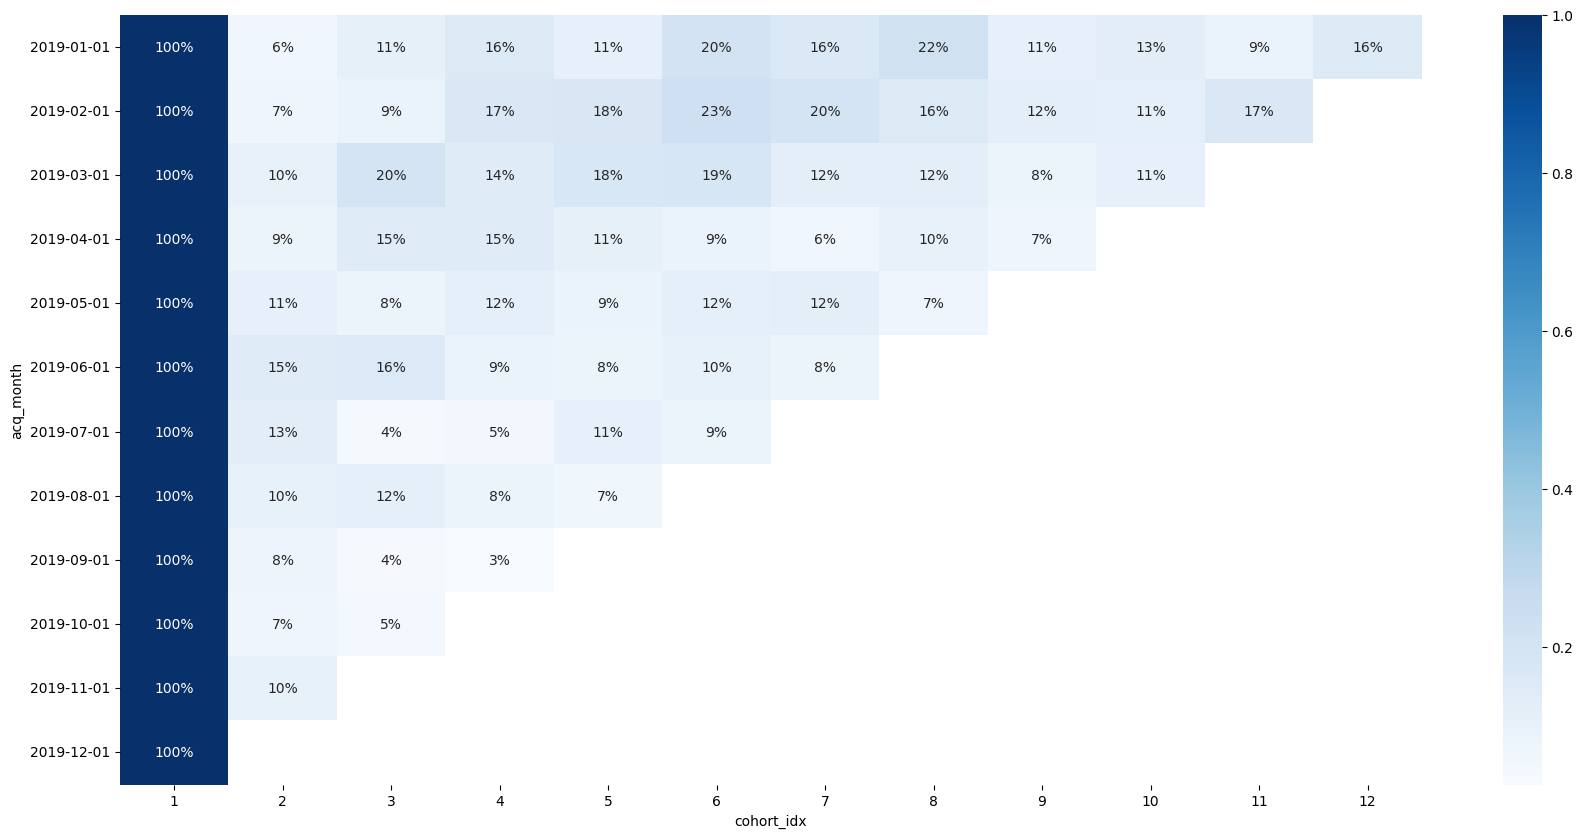

In [175]:
#create a percentages visual
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%',cmap='Blues')

**conclusion:** The heatmap clearly indicates that January boasts the highest retention rate.